In [43]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

using JLD2
using ProgressMeter
using LinearAlgebra
using Distributions
using StatsPlots
using ColorSchemes
using Colors
using Plots
default(label="", grid=false, linewidth=3, markersize=3, margin=15Plots.pt)
logocolors = Colors.JULIA_LOGO_COLORS

  Activating project at `c:\Syndr\Wouter\Onderzoek\Projecten\tue\efe-planning\IWAI2024-ambiguity`


(red = RGB{N0f8}(0.796,0.235,0.2), green = RGB{N0f8}(0.22,0.596,0.149), blue = RGB{N0f8}(0.251,0.388,0.847), purple = RGB{N0f8}(0.584,0.345,0.698))

In [112]:
results_EFE2 = load("results/botnav-cart2polar-EFE2.jld2")
results_EFE1 = load("results/botnav-cart2polar-EFE1.jld2")
results_EFER = load("results/botnav-cart2polar-EFER.jld2")

len_trial = results_EFE2["len_trial"]
tsteps = range(0, step=results_EFE2["Δt"], length=results_EFE2["len_trial"])
# s_star = results_EFE2["s_star"]
z_0 = results_EFE2["z_0"]
s_star = 0.5

F_EFE2 = results_EFE2["F"]
F_EFE1 = results_EFE1["F"]
F_EFER = results_EFER["F"]

J_EFE2 = results_EFE2["J"]
J_EFE1 = results_EFE1["J"]
J_EFER = results_EFER["J"]

ix = 1:100
ik = 2:30

2:30

In [113]:
tJ_EFE2 = round(mean(J_EFE2[ik,ix]), digits=2)
tJ_EFE1 = round(mean(J_EFE1[ik,ix]), digits=2)
tJ_EFER = round(mean(J_EFER[ik,ix]), digits=2)

println("Total J EFE2 = $tJ_EFE2")
println("Total J EFE1 = $tJ_EFE1")
println("Total J EFER = $tJ_EFER")

Total J EFE2 = 4.69
Total J EFE1 = 4.74
Total J EFER = 4.35


In [114]:
tF_EFE2 = round(mean(F_EFE2[ik,ix]), digits=2)
tF_EFE1 = round(mean(F_EFE1[ik,ix]), digits=2)
tF_EFER = round(mean(F_EFER[ik,ix]), digits=2)

println("Total F EFE2 = $tF_EFE2")
println("Total F EFE1 = $tF_EFE1")
println("Total F EFER = $tF_EFER")

Total F EFE2 = 2446.66
Total F EFE1 = 17198.04
Total F EFER = 33743.23


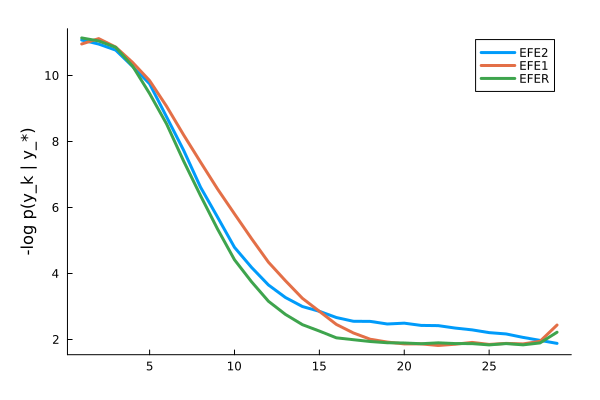

In [116]:
plot(ylabel="-log p(y_k | y_*)")
plot!(mean(J_EFE2[ik,ix], dims=2), label="EFE2")
plot!(mean(J_EFE1[ik,ix], dims=2), label="EFE1")
plot!(mean(J_EFER[ik,ix], dims=2), label="EFER")
# plot!(mean(YGP_MPC[:,ix], dims=2), label="MPC")

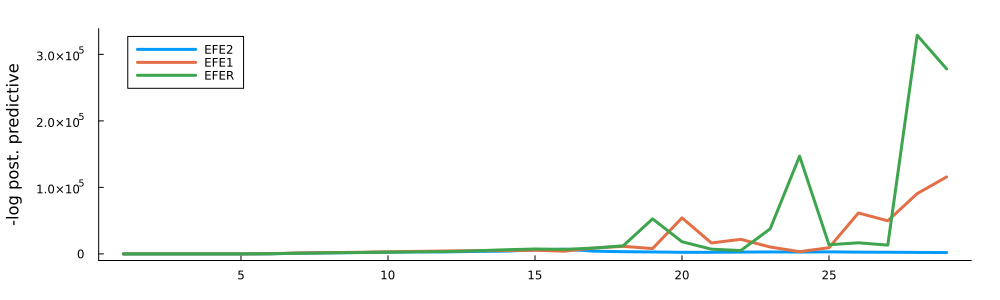

In [118]:
plot(size=(1000,300), ylabel="-log post. predictive", legend=:topleft)
plot!(mean(F_EFE2[ik,ix], dims=2), label="EFE2")
plot!(mean(F_EFE1[ik,ix], dims=2), label="EFE1")
plot!(mean(F_EFER[ik,ix], dims=2), label="EFER")

In [68]:
savefig("figures/F-comparison-s_star$s_star.png")

"c:\\Syndr\\Wouter\\Onderzoek\\Projecten\\tue\\efe-planning\\IWAI2024-ambiguity\\experiments\\figures\\F-comparison-s_star0.5.png"

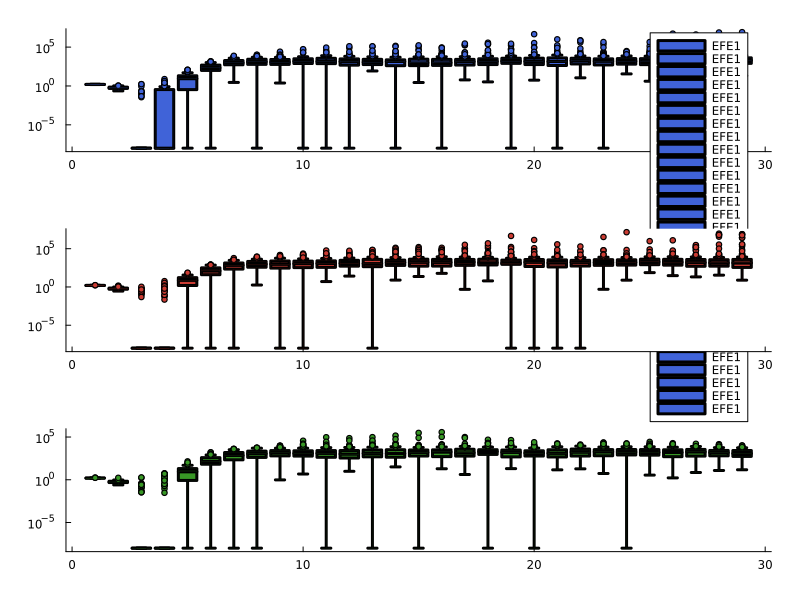

In [85]:
p1 = boxplot(max.(1e-8, F_EFE1[ik,ix])', label="EFE1", color=logocolors.blue, yscale=:log10)
p2 = boxplot(max.(1e-8, F_EFER[ik,ix])', color=logocolors.red, yscale=:log10)
p3 = boxplot(max.(1e-8, F_EFE2[ik,ix])', color=logocolors.green, yscale=:log10)

plot(p1,p2,p3, layout=(3,1), size=(800,600))

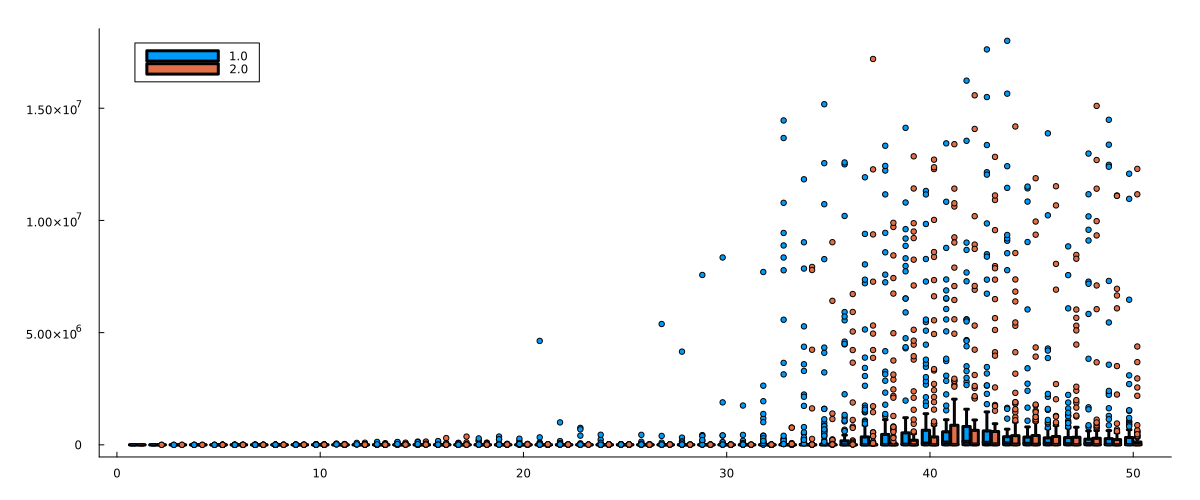

In [11]:
# yl = (-5, 100)

FF  = [F_EFE1[:]; F_EFE2[:]]
FFX = [repeat(range(1,len_trial), length(ix)); repeat(range(1,len_trial), length(ix))]
FFM = [ones((len_trial)*length(ix)); 2*ones((len_trial)*length(ix))]

groupedboxplot(FFX, FF, group = FFM)
plot!(size=(1200,500))

┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\Wouter Kouw\.julia\packages\Plots\QWCV6\src\args.jl:1148
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\Wouter Kouw\.julia\packages\Plots\QWCV6\src\args.jl:1148


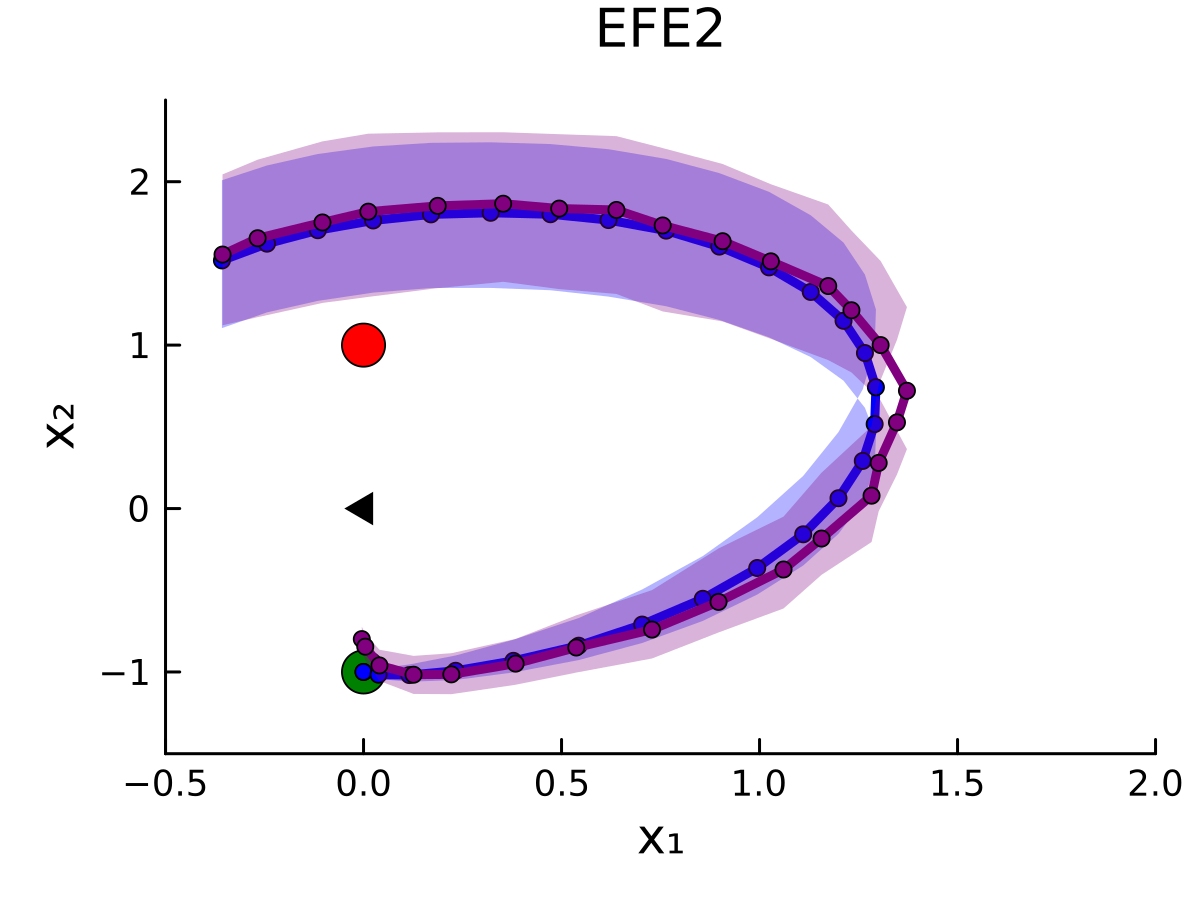

In [160]:
xl = (-.5,2.)
yl = (-1.5,2.5)

z_star = [0.0, 1., 0.0, 0.0]

zs_sim = zeros(4,len_trial,length(ix))
mz_est = zeros(4,len_trial,length(ix))

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal", markersize=8)

k = len_trial
for jj in ix
    results_EFE2 = load("results/botnav-cart2polar-EFE2-$jj.jld2")
    zs_sim[:,:,jj] = results_EFE2["z_sim"]
    mz_est[:,:,jj] = results_EFE2["z_est"][1]
end

mz_sim = mean(zs_sim, dims=3)
sz_sim = std( zs_sim, dims=3) 

mmz_est = mean(mz_est, dims=3)
smz_est = std(mz_est, dims=3)

plot!(mz_sim[1,ik], mz_sim[2,ik], ribbon=(sz_sim[1,ik], sz_sim[2,ik]), marker=".", color="blue", label="system", fillalpha=0.3)
plot!(mmz_est[1,ik], mmz_est[2,ik], ribbon=(smz_est[1,ik], smz_est[2,ik]), marker=".", color="purple", label="estimate", fillalpha=0.3)
plot!(size=(400,300), title="EFE2", dpi=300, titlefontsize=12, margin=5Plots.pt, legend=:false)

In [161]:
savefig("figures/botnav-cart2polar-EFE2.png")

"c:\\Syndr\\Wouter\\Onderzoek\\Projecten\\tue\\efe-planning\\IWAI2024-ambiguity\\experiments\\figures\\botnav-cart2polar-EFE2.png"

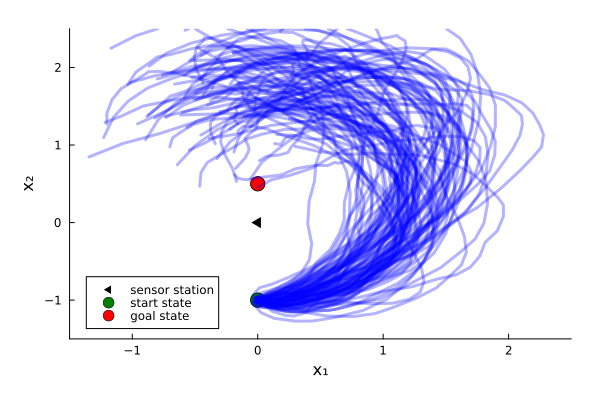

In [21]:
xl = (-1.5,2.5)
yl = (-1.5,2.5)

z_0 = results_EFE2["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, .5, 0.0, 0.0]

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

k = len_trial
for jj in ix
    results_EFE2 = load("results/botnav-cart2polar-EFE2-$jj.jld2")
    z_sim = results_EFE2["z_sim"]
    # z_est = results_EFE2["z_est"]

    # plot!(z_est[1][1,1:k], z_est[1][2,1:k], c="purple", marker=".", label="state estimates", alpha=0.1, markersize=5)
    # for j in 1:len_trial
    #     covellipse!(z_est[1][1:2,j], z_est[2][1:2,1:2,j], n_std=1, color="purple", linewidth=0, fillalpha=0.01)
    # end

    plot!(z_sim[1,ik], z_sim[2,ik], color="blue", alpha=0.3)
end
plot!()

┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\Wouter Kouw\.julia\packages\Plots\QWCV6\src\args.jl:1148
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\Wouter Kouw\.julia\packages\Plots\QWCV6\src\args.jl:1148


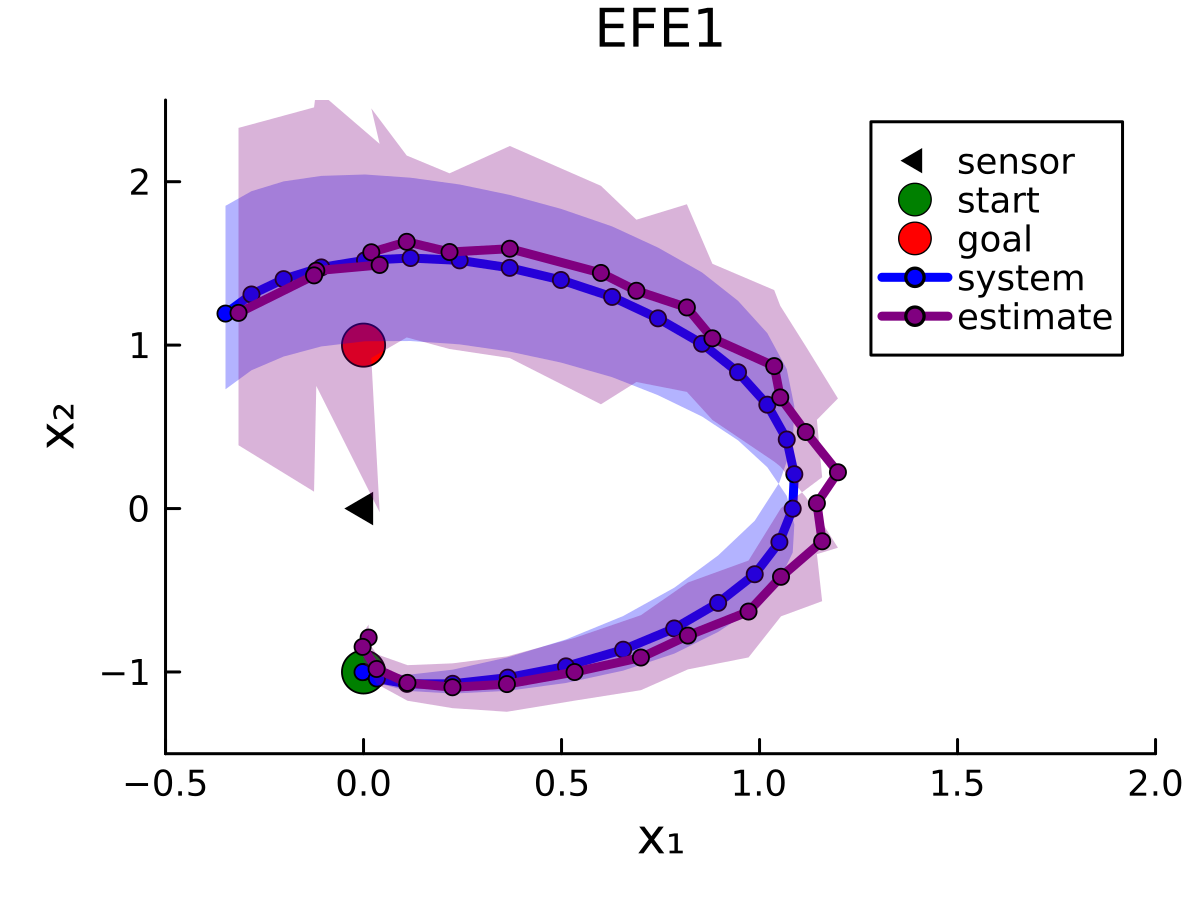

In [162]:
xl = (-.5,2.)
yl = (-1.5,2.5)


# z_star = results_EFE2["z_star"]
z_star = [0.0, 1., 0.0, 0.0]

zs_sim = zeros(4,len_trial,length(ix))
mz_est = zeros(4,len_trial,length(ix))

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal", markersize=8)

k = len_trial
for jj in ix
    results_EFE1 = load("results/botnav-cart2polar-EFE1-$jj.jld2")
    zs_sim[:,:,jj] = results_EFE1["z_sim"]
    mz_est[:,:,jj] = results_EFE1["z_est"][1]
end

mz_sim = mean(zs_sim, dims=3)
sz_sim = std( zs_sim, dims=3) 

mmz_est = mean(mz_est, dims=3)
smz_est = std(mz_est, dims=3)

plot!(mz_sim[1,ik], mz_sim[2,ik], ribbon=(sz_sim[1,ik], sz_sim[2,ik]), marker=".", color="blue", label="system", fillalpha=0.3)
plot!(mmz_est[1,ik], mmz_est[2,ik], ribbon=(smz_est[1,ik], smz_est[2,ik]), marker=".", color="purple", label="estimate", fillalpha=0.3)
plot!(size=(400,300), title="EFE1", dpi=300, titlefontsize=12, margin=5Plots.pt)

In [163]:
savefig("figures/botnav-cart2polar-EFE1.png")

"c:\\Syndr\\Wouter\\Onderzoek\\Projecten\\tue\\efe-planning\\IWAI2024-ambiguity\\experiments\\figures\\botnav-cart2polar-EFE1.png"

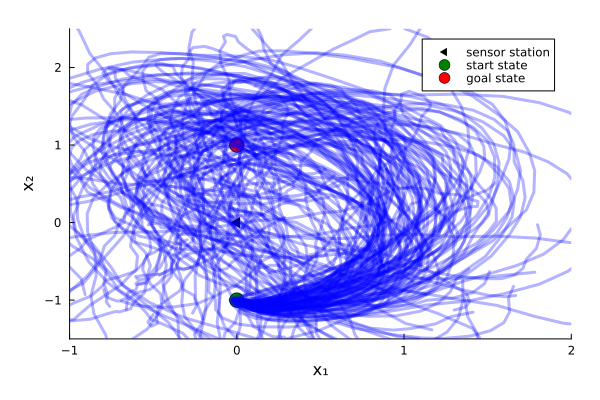

In [15]:
z_0 = results_EFE1["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, 1., 0.0, 0.0]

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

for jj in ix
    results_EFE1 = load("results/botnav-cart2polar-EFE1-$jj.jld2")
    z_sim_EFE1 = results_EFE1["z_sim"]
    plot!(z_sim_EFE1[1,:], z_sim_EFE1[2,:], color="blue", alpha=0.3)
end
plot!()

┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\Wouter Kouw\.julia\packages\Plots\QWCV6\src\args.jl:1148
┌ Warning: Skipped marker arg ..
└ @ Plots C:\Users\Wouter Kouw\.julia\packages\Plots\QWCV6\src\args.jl:1148


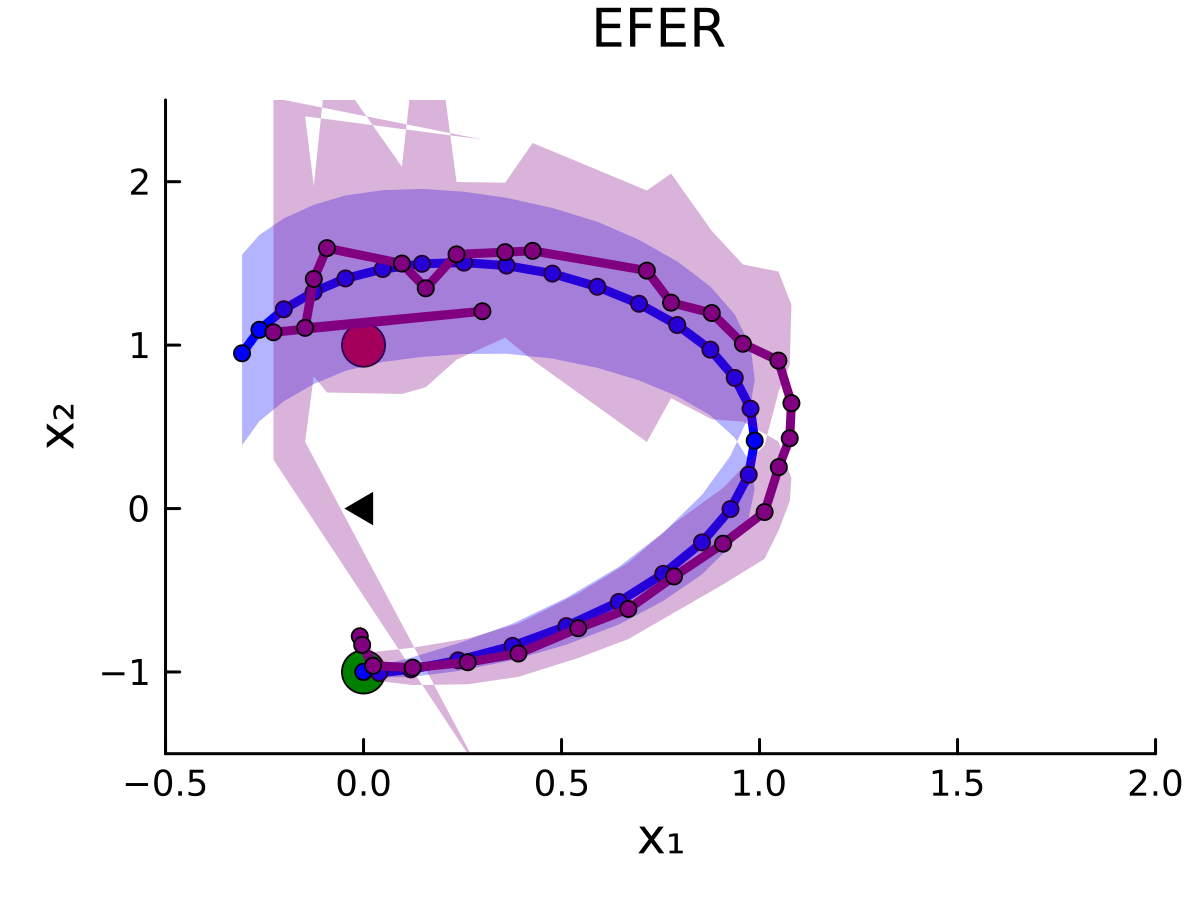

In [170]:
xl = (-.5,2.)
yl = (-1.5,2.5)

zs_sim = zeros(4,len_trial,length(ix))
mz_est = zeros(4,len_trial,length(ix))

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal", markersize=8)

k = len_trial
for jj in ix
    results_EFER = load("results/botnav-cart2polar-EFER-$jj.jld2")
    zs_sim[:,:,jj] = results_EFER["z_sim"]
    mz_est[:,:,jj] = results_EFER["z_est"][1]
end

mz_sim = mean(zs_sim, dims=3)
sz_sim = std( zs_sim, dims=3) 

mmz_est = mean(mz_est, dims=3)
smz_est = std(mz_est, dims=3)

plot!(mz_sim[1,ik], mz_sim[2,ik], ribbon=(sz_sim[1,ik], sz_sim[2,ik]), marker=".", color="blue", label="system states", fillalpha=0.3)
plot!(mmz_est[1,ik], mmz_est[2,ik], ribbon=(smz_est[1,ik], smz_est[2,ik]), marker=".", color="purple", label="state estimates", fillalpha=0.3)
plot!(size=(400,300), title="EFER", dpi=300, titlefontsize=12, margin=5Plots.pt, legend=:false)

In [171]:
savefig("figures/botnav-cart2polar-EFER.png")

"c:\\Syndr\\Wouter\\Onderzoek\\Projecten\\tue\\efe-planning\\IWAI2024-ambiguity\\experiments\\figures\\botnav-cart2polar-EFER.png"

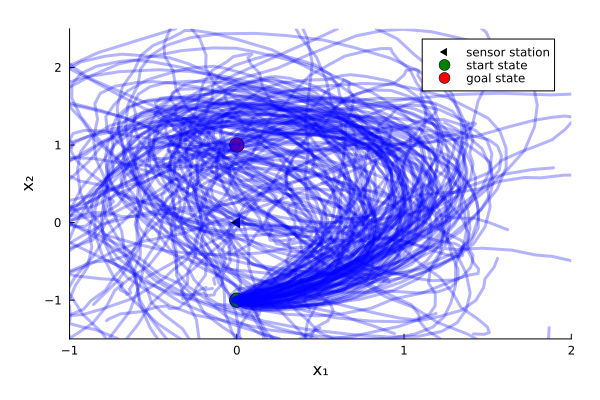

In [17]:
z_0 = results_EFER["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, 1., 0.0, 0.0]

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

for jj in ix
    results_EFER = load("results/botnav-cart2polar-EFER-$jj.jld2")
    z_sim_EFER = results_EFER["z_sim"]
    plot!(z_sim_EFER[1,:], z_sim_EFER[2,:], color="blue", alpha=0.3)
end
plot!()

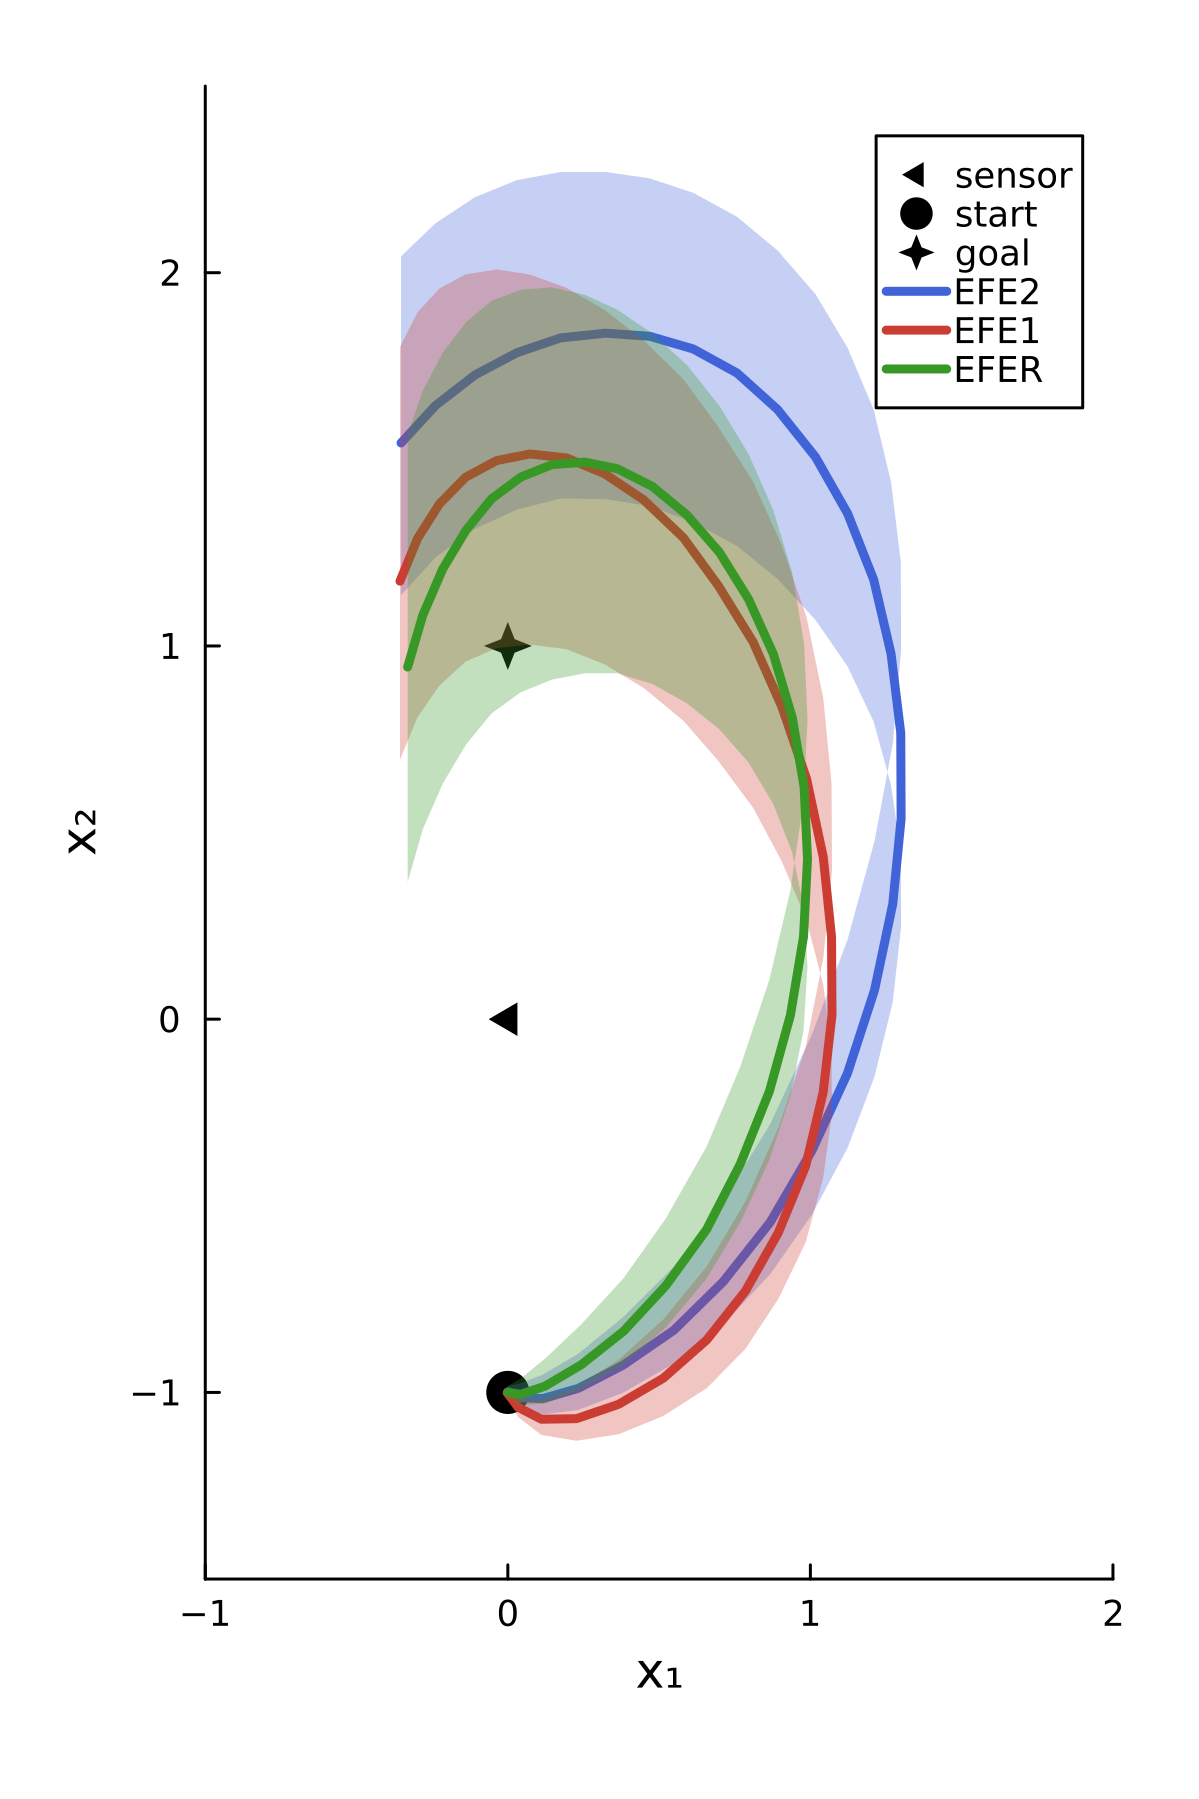

In [80]:
xl = (-1.,2.)
yl = (-1.5,2.5)

z_0 = results_EFE2["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, 1., 0.0, 0.0]

zs_sim_EFE2 = zeros(4,len_trial,ix[end])
zs_sim_EFE1 = zeros(4,len_trial,ix[end])
zs_sim_EFER = zeros(4,len_trial,ix[end])

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="black", marker=:circle, label="start", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="black", marker=:star4, label="goal", markersize=8)

k = len_trial
for jj in ix
    results_EFE2 = load("results/botnav-cart2polar-EFE2-$jj.jld2")
    results_EFE1 = load("results/botnav-cart2polar-EFE1-$jj.jld2")
    results_EFER = load("results/botnav-cart2polar-EFER-$jj.jld2")
    
    zs_sim_EFE2[:,:,jj] = results_EFE2["z_sim"]
    zs_sim_EFE1[:,:,jj] = results_EFE1["z_sim"]
    zs_sim_EFER[:,:,jj] = results_EFER["z_sim"]
end

mz_sim_EFE2 = mean(zs_sim_EFE2, dims=3)
sz_sim_EFE2 = std( zs_sim_EFE2, dims=3) 
mz_sim_EFE1 = mean(zs_sim_EFE1, dims=3)
sz_sim_EFE1 = std( zs_sim_EFE1, dims=3) 
mz_sim_EFER = mean(zs_sim_EFER, dims=3)
sz_sim_EFER = std( zs_sim_EFER, dims=3) 

plot!(mz_sim_EFE2[1,ik], mz_sim_EFE2[2,ik], ribbon=(sz_sim_EFE2[1,ik], sz_sim_EFE2[2,ik]), label="EFE2", color=logocolors.blue, fillalpha=0.3)
plot!(mz_sim_EFE1[1,ik], mz_sim_EFE1[2,ik], ribbon=(sz_sim_EFE1[1,ik], sz_sim_EFE1[2,ik]), label="EFE1", color=logocolors.red, fillalpha=0.3)
plot!(mz_sim_EFER[1,ik], mz_sim_EFER[2,ik], ribbon=(sz_sim_EFER[1,ik], sz_sim_EFER[2,ik]), label="EFER", color=logocolors.green, fillalpha=0.3)
plot!(size=(400,600), dpi=300)

In [81]:
savefig("figures/EFE-paths-s_star$s_star.png")

"c:\\Syndr\\Wouter\\Onderzoek\\Projecten\\tue\\efe-planning\\IWAI2024-ambiguity\\experiments\\figures\\EFE-paths-s_star0.5.png"

In [ ]:
xl = (-1.5,2.5)
yl = (-1.5,2.5)

z_0 = results_EFE2["z_0"]
# z_star = results_EFE2["z_star"]
z_star = [0.0, .5, 0.0, 0.0]

plot(xlims=xl, ylims=yl, xlabel="x₁", ylabel="x₂")
scatter!([0.0], [0.0], color="black", marker=:ltriangle, label="sensor station", markersize=8)
scatter!([z_0[1]], [z_0[2]], color="green", label="start state", markersize=8)
scatter!([z_star[1]], [z_star[2]], color="red", label="goal state", markersize=8)

k = len_trial
for jj in ix
    results_EFE2 = load("results/botnav-cart2polar-EFE2-$jj.jld2")
    z_sim = results_EFE2["z_sim"]
    # z_est = results_EFE2["z_est"]

    # plot!(z_est[1][1,1:k], z_est[1][2,1:k], c="purple", marker=".", label="state estimates", alpha=0.1, markersize=5)
    # for j in 1:len_trial
    #     covellipse!(z_est[1][1:2,j], z_est[2][1:2,1:2,j], n_std=1, color="purple", linewidth=0, fillalpha=0.01)
    # end

    plot!(z_sim[1,ik], z_sim[2,ik], color="blue", alpha=0.3)
end
plot!()